In [ ]:
!pip install rdkit-pypi

In [56]:
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

import pandas as pd
from tqdm import tqdm

In [57]:
df = pd.read_excel("data/19_35000.xlsx", index_col=0).reset_index(drop=True)
df.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


In [58]:
df.head()

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]\N=C(N)\N[C@@H](C1)[C@@H](NC(=O)C)[C@@H](C=...
1,CHEMBL3818159,0.000016,O=C(O)C1=C[C@H](N)[C@@H](NC(=O)C)[C@@H](C1)COC...
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O...
3,CHEMBL1956715,0.000032,CC(=O)N[C@H]([C@H](C1)N)[C@@H](C=C1C([O-])=O)O...
4,CHEMBL4444029,0.000041,O=C(O)c1c(O)c(=O)cc([nH]1)-c(c2C)ccc(c2)-c3noc...


## Сanonical SMILES

In [59]:
# There might be one or more valid SMILES that can represent one compound
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles] 
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

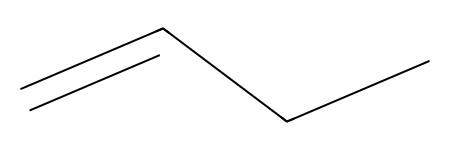

In [60]:
Chem.MolFromSmiles('C=CCC')

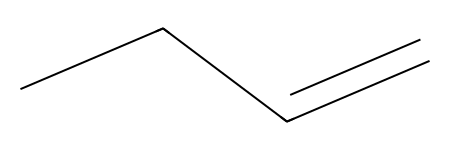

In [61]:
Chem.MolFromSmiles('CCC=C')

In [62]:
canonical_smiles(['C=CCC']) == canonical_smiles(['CCC=C'])

True

In [63]:
canon_smiles = canonical_smiles(df['SMILES'])
print(f"Difference {len(df['SMILES']) - len(set(canon_smiles))}")
# Put the smiles in the dataframe
df['SMILES'] = canon_smiles
df

[11:42:19] Conflicting single bond directions around double bond at index 55.
[11:42:19]   BondStereo set to STEREONONE and single bond directions set to NONE.
[11:42:22] Conflicting single bond directions around double bond at index 7.
[11:42:22]   BondStereo set to STEREONONE and single bond directions set to NONE.


Difference 117


,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]/N=C(\N)N[C@H]1CC(P(=O)(O)O)=C[C@@H](OC(CC)...
1,CHEMBL3818159,0.000016,CCC(CC)OC[C@@H]1CC(C(=O)O)=C[C@H](N)[C@H]1NC(C)=O
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@@H]1[C@@H](N)CC(C(=O)[O-])=C[C@H]1...
3,CHEMBL1956715,0.000032,CCC(CC)O[C@@H]1C=C(C(=O)[O-])C[C@H](N)[C@H]1NC...
4,CHEMBL4444029,0.000041,Cc1cc(-c2noc(=O)[nH]2)ccc1-c1cc(=O)c(O)c(C(=O)...
...,...,...,...
36372,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@H]2[C@@H]1[C@H](N/C(=N/C(=O)...
36373,CHEMBL109004,2372.100000,CC(=O)Nc1ccc(C(=O)O)cc1OC(C)=O
36374,CHEMBL2259758,2600.970000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)O[C@@](O...
36375,CHEMBL109781,2793.000000,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CCCN


In [41]:
# Create a list for duplicate smiles
duplicates_smiles = df[df['SMILES'].duplicated()]['SMILES'].values
df[df['SMILES'].isin(duplicates_smiles)].sort_values(by=['SMILES'])

,Title,IC50,SMILES
34040,4794-KUD-301,10.000000,C/C(=N\NC(=S)Nc1ccc(F)cc1)c1cc(C(F)(F)F)n[nH]1
34039,4794-KUD-301,10.000000,C/C(=N\NC(=S)Nc1ccc(F)cc1)c1cc(C(F)(F)F)n[nH]1
28752,CHEMBL1789779,6.600000,C1=C[C@H]2[C@@H]3[C@@H]4[C@H]5C=C[C@@H]4[C@@]4...
31131,CHEMBL1774319,7.800000,C1=C[C@H]2[C@@H]3[C@@H]4[C@H]5C=C[C@@H]4[C@@]4...
9679,CHEMBL1256620,1.865000,C=C(C)[C@@H]1CC=C(C(=O)O)CC1
...,...,...,...
15,CHEMBL2114178,0.000156,[H]/N=C(/N)N[C@H]1CC(C(=O)O)=C[C@@H](O[C@H](C)...
11639,CHEMBL1813529,2.416000,[H]/N=C(\N)N[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)C...
16,CHEMBL1852739,0.000177,[H]/N=C(\N)N[C@H]1CC(C(=O)OCC)=C[C@@H](OC(CC)C...
1625,CHEMBL415879,0.163000,c1cnc2c(c1)ccc1cccnc12


## Drop duplicate values

In [42]:
df_new = df.drop_duplicates(subset=['SMILES'])
len(df_new)

36260

In [43]:
df_new

,Title,IC50,SMILES
0,CHEMBL2206459,0.000015,[H]/N=C(\N)N[C@H]1CC(P(=O)(O)O)=C[C@@H](OC(CC)...
1,CHEMBL3818159,0.000016,CCC(CC)OC[C@@H]1CC(C(=O)O)=C[C@H](N)[C@H]1NC(C)=O
2,CHEMBL1956716,0.000033,C=CC(=O)N[C@@H]1[C@@H](N)CC(C(=O)[O-])=C[C@H]1...
3,CHEMBL1956715,0.000032,CCC(CC)O[C@@H]1C=C(C(=O)[O-])C[C@H](N)[C@H]1NC...
4,CHEMBL4444029,0.000041,Cc1cc(-c2noc(=O)[nH]2)ccc1-c1cc(=O)c(O)c(C(=O)...
...,...,...,...
36372,CHEMBL3699085,2366.790000,CC(=O)N[C@H]1CC[C@H]2[C@@H]1[C@H](N/C(=N/C(=O)...
36373,CHEMBL109004,2372.100000,CC(=O)Nc1ccc(C(=O)O)cc1OC(C)=O
36374,CHEMBL2259758,2600.970000,CC(=O)N[C@H]1[C@H]([C@H](O)[C@H](O)CO)O[C@@](O...
36375,CHEMBL109781,2793.000000,CC(=O)Nc1ccc(C(=O)O)cc1NC(=O)CCCN


## Calculate descriptors using RDkit

### General molecular descriptors-about 200 molecular descriptors

In [46]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles] 
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()
    
    Mol_descriptors =[]
    for mol in tqdm(mols):
        mol = Chem.AddHs(mol)
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors, desc_names 

Mol_descriptors, desc_names = RDkit_descriptors(df_new['SMILES'])

100%|██████████| 36260/36260 [14:37<00:00, 41.33it/s]  


In [48]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors, columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,13.510447,-6.354603,13.510447,0.934916,0.216971,362.367,335.151,362.171907,138,0,...,0,0,0,0,0,0,0,0,0,0
1,12.807959,-5.220150,12.807959,1.222358,0.651957,298.383,272.175,298.189257,120,0,...,0,0,0,0,0,0,0,0,0,0
2,12.864566,-5.006678,12.864566,1.260752,0.624022,295.359,272.175,295.166331,118,0,...,0,0,0,0,0,0,0,0,0,0
3,12.667529,-5.016259,12.667529,1.292862,0.681758,283.348,260.164,283.166331,114,0,...,0,0,0,0,0,0,0,0,0,0
4,12.586301,-3.314751,12.586301,0.006841,0.561612,329.268,318.180,329.064785,122,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36255,14.256964,-8.832100,14.256964,1.249828,0.190380,622.839,576.471,622.318662,238,0,...,0,0,0,0,0,0,0,0,0,0
36256,11.846633,-3.414030,11.846633,0.468896,0.609570,237.211,226.123,237.063722,90,0,...,0,0,0,0,0,0,0,0,0,0
36257,15.065984,-7.234815,15.065984,0.765750,0.046950,866.987,812.555,866.340809,330,0,...,0,1,0,0,0,0,0,0,0,0
36258,12.917236,-4.179439,12.917236,0.634721,0.619049,279.296,262.160,279.121906,108,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df_with_200_descriptors = df_with_200_descriptors.join(df['IC50'])

In [67]:
df_with_200_descriptors.to_csv('data_200_dsc.csv')